objective - predict CO2 emissions (g/km)
Target variable - CO2 emissions (g/km)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load Data
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3475,CADILLAC,CTS,MID-SIZE,3.6,6,AS8,X,11.6,8.0,10.0,28,234
7064,LAMBORGHINI,Urus,SUV - STANDARD,4.0,8,AS8,Z,19.2,14.1,16.9,17,384
1455,FORD,ESCAPE AWD,SUV - SMALL,1.6,4,AS6,X,10.6,8.0,9.4,30,216
2287,BMW,428i COUPE,COMPACT,2.0,4,AS8,Z,9.9,6.5,8.4,34,197
5359,SUBARU,LEGACY AWD,MID-SIZE,2.5,4,AV7,X,9.3,7.0,8.3,34,193


EDA 

In [3]:
#Summary statistics
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# Missing values
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


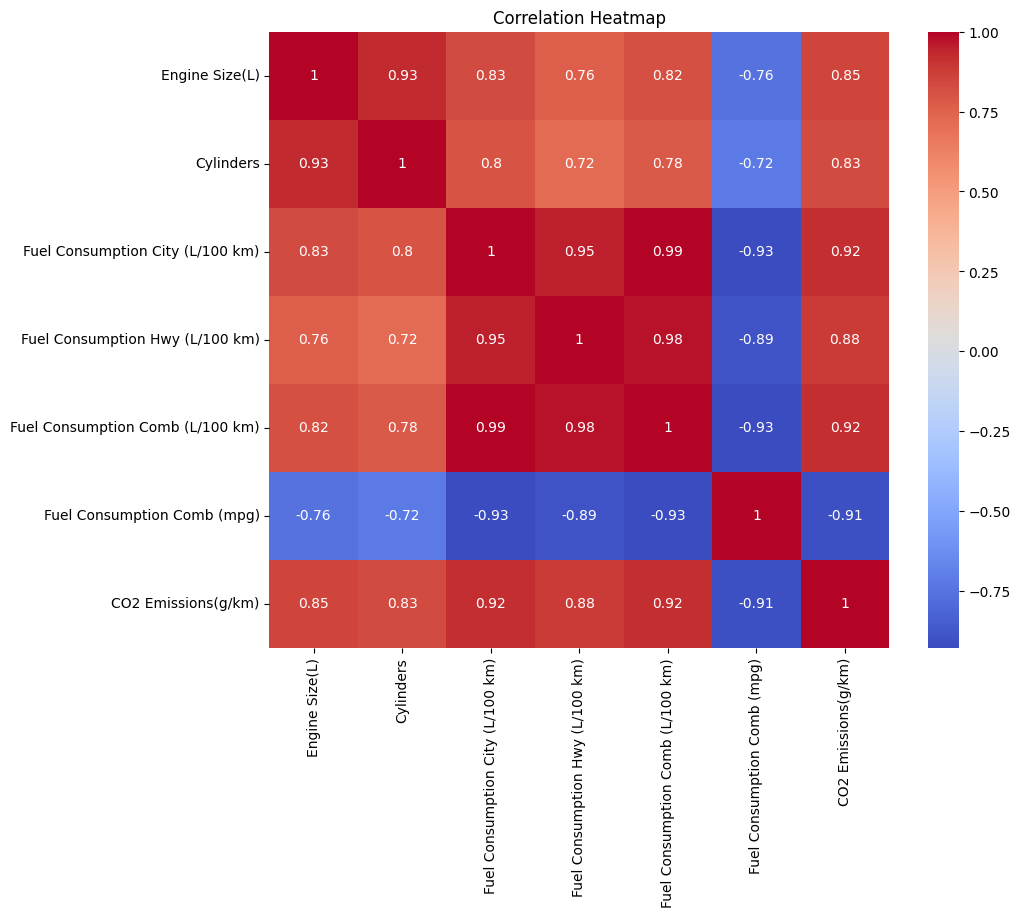

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


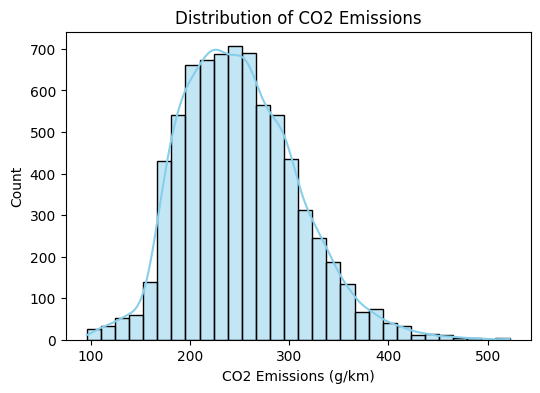

In [7]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.show()

Data Processing 

In [10]:
# Data Cleaning
df.columns = df.columns.str.replace(" (L/100 km)", "").str.replace("(L)", "").str.replace("(g/km)", "").str.replace(" ", "_")
df.columns = df.columns.str.lower()
df = df.drop_duplicates()
df = df.dropna()

In [9]:
df.shape

(6282, 12)

In [11]:
print(df.columns)

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')


In [12]:
# Split into features (X) and label (y) 
X = df.drop(columns=['co2_emissions'])
X_numeric = X.select_dtypes(include=['number'])
y = df['co2_emissions']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

Train Model 
1. LinearRegression 

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

2. Decision Tree

In [15]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

3. Random Forest

In [17]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
#To clearly compare models in one table.
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

# Print Evaluation
print('\n--- Model Evaluation ---')
print('Linear Regression:   MAE:', mae_lr, 'MSE:', mse_lr, 'R²:', r2_lr)
print('Decision Tree:       MAE:', mae_dt, 'MSE:', mse_dt, 'R²:', r2_dt)
print('Random Forest:       MAE:', mae_rf, 'MSE:', mse_rf, 'R²:', r2_rf)


--- Model Evaluation ---
Linear Regression:   MAE: 12.102140638722767 MSE: 368.3228586622491 R²: 0.8979353672510262
Decision Tree:       MAE: 3.4923690823452156 MSE: 137.03235634139924 R²: 0.9620274528289956
Random Forest:       MAE: 3.6072465778106446 MSE: 89.57754227933954 R²: 0.9751774869784005


In [19]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
})
print('\nModel Comparison Table:')
print(results)


Model Comparison Table:
               Model        MAE         MSE        R2
0  Linear Regression  12.102141  368.322859  0.897935
1      Decision Tree   3.492369  137.032356  0.962027
2      Random Forest   3.607247   89.577542  0.975177


Write the models analysis.

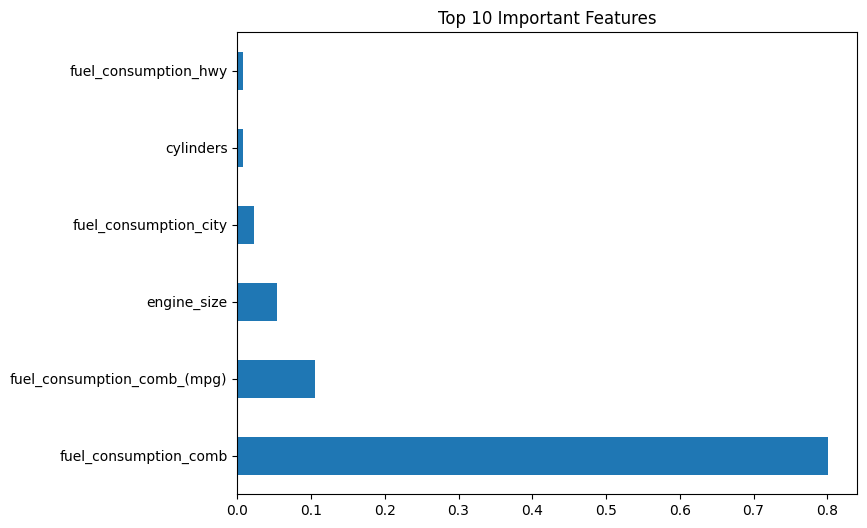

In [ ]:
#To understand which input features influence the model the most.
plt.figure(figsize=(8, 6))
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

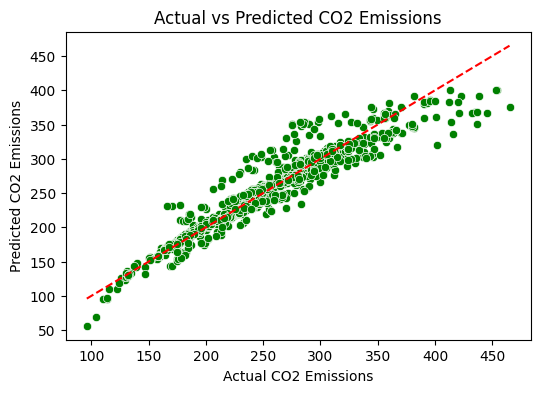

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()

Mention the interpretation